# Titanic passengers dataset Analysis

## Introduction


The sinking of the RMS Titanic occurred on the night of 14 April through to the morning of 15 April 1912 in the North Atlantic Ocean, four days into the ship's maiden voyage from Southampton to New York City. The largest passenger liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg at around 23:40 (ship's time)[a] on Sunday, 14 April 1912. Her sinking two hours and forty minutes later at 02:20 (05:18 GMT) on Monday, 15 April resulted in the deaths of more than 1,500 people, which made it one of the deadliest peacetime maritime disasters in history.

Wikipedia contributors. "Sinking of the RMS Titanic." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 24 Jul. 2017. Web. 
8 Aug. 2017

Titanic Data dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

This Analysis is used to find factors that made people more likely to survive: 
1. Could the rich really buy their places in the lifeboats? 
2. Did women and children really survived in better proportion in comparison of men independantly of their social ranking ? (Women and children before men in the lifeboats policy) 
3. Then, did a young girl or lady from a rich family really had better chances of surviving overall?
4. Overall did a whole family had better chances of surviving than single persons?

# Data Wrangling

Titanic_data.csv will be the core and only csv used for this analysis. 

In [1]:
# import all necessary packages and functions.
import csv
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_style('whitegrid')
matplotlib.style.use('ggplot')

%matplotlib inline

## Understanding the data and its variables/features

Report to: https://www.kaggle.com/c/titanic/data for more information on the variables definition


In [2]:
# Display the first few rows of the station data file.
titanic_data = pd.read_csv('titanic_data.csv')
display(titanic_data.head())
titanic_data.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
# Drop variables that are not required to answer raised questions and display head again
titanic_data = titanic_data.drop(['Ticket', 'Name', 'PassengerId', 'Cabin'], axis=1)
display(titanic_data.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## I am a rich, let me enter this lifeboat immediatly! Of course Monsieur, part ici...
'After leaving Southampton on 10 April 1912, Titanic called at Cherbourg in France and Queenstown (now Cobh) in Ireland before heading west to New York.' 

In [4]:
# Fill the two missing values in Embarked with the most occurred value "S"
titanic_data['Embarked'] = titanic_data['Embarked'].fillna("S")

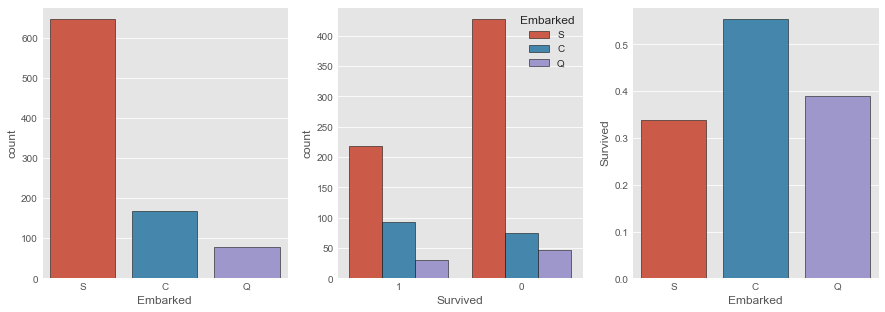

In [5]:
# Plot on 3 axis with matplotlib subplots method to see general Embarked variable trend
fig, (axis1,axis2,axis3) = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
sns.countplot(x='Embarked', data=titanic_data, edgecolor='black', ax=axis1)
sns.countplot(x='Survived', hue='Embarked', data=titanic_data, order=[1,0], edgecolor='black', ax=axis2)

# Group by embarked, and get the mean for survived passengers for each value in Embarked
embark_mean = titanic_data[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_mean,order=['S','C','Q'],edgecolor='black', ax=axis3)

It seems that the people embarking from Cherbourg in France were a bit more likely to survive. Were they richer overall? or was this group composed of more children and women? At first, the fares variable could help us determine if they were indeed richer.

In [6]:
# Finding the extremums for the range of the Fares
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# get fare for survived and none surviving passengers overall
fare_not_survived = titanic_data["Fare"][titanic_data["Survived"] == 0]
fare_survived = titanic_data["Fare"][titanic_data["Survived"] == 1]

# get fare for Embarked variable
Cherbourg = titanic_data["Fare"][titanic_data["Embarked"] == 'C']
Queen = titanic_data["Fare"][titanic_data["Embarked"] == 'Q']
South = titanic_data["Fare"][titanic_data["Embarked"] == 'S']

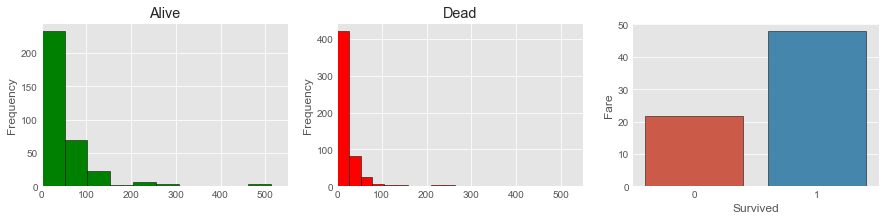

In [8]:
# convert from float to int
titanic_data['Fare'] = titanic_data['Fare'].astype(int)

# ploting the fare for surviving and none surviving persons bins size represents 10$
fig, (axis1,axis2,axis3) = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
fare_survived.plot(kind='hist', figsize=(15,3), xlim=(0,550), ax=axis1, color = 'green', edgecolor='black', title='Alive')
fare_not_survived.plot(kind='hist', figsize=(15,3), xlim=(0,550), ax=axis2, color = 'red', edgecolor='black', title='Dead')

# plotting the fare mean vs survived variable
fare_mean = titanic_data[["Fare", "Survived"]].groupby(['Survived'],as_index=False).mean()
sns.barplot(x='Survived', y= 'Fare', data= fare_mean,order=[0,1], edgecolor='black', ax=axis3)

No suprise here, richer people (people who paid a higher fair), where most likely to survive

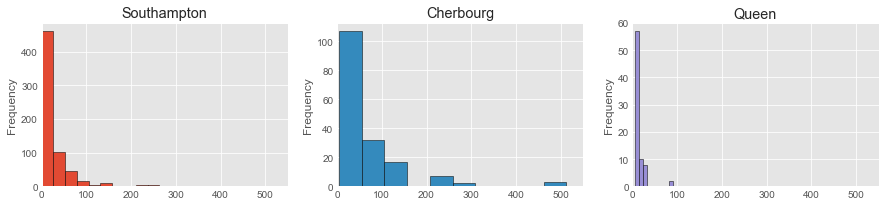

In [9]:
# Plotting fare histogram by embarked town
fig, (axis1,axis2,axis3) = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
South.plot(kind='hist', figsize=(15,3), xlim=(0,550), edgecolor='black', ax=axis1, color = 'C0', title='Southampton')
Cherbourg.plot(kind='hist', figsize=(15,3), xlim=(0,550), edgecolor='black', ax=axis2, color = 'C1', title='Cherbourg')
Queen.plot(kind='hist', figsize=(15,3), xlim=(0,550), edgecolor='black', ax=axis3, color = 'C2', title='Queen')


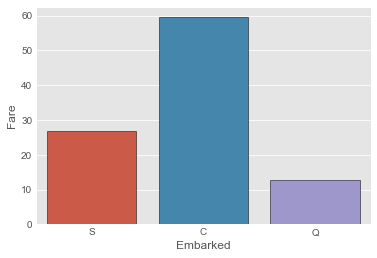

In [10]:
Fare_mean = (titanic_data[["Embarked", "Fare"]].groupby(['Embarked'],as_index=False)).mean()
sns.barplot(x='Embarked', y='Fare', data= Fare_mean, order=['S','C','Q'], edgecolor='black')

And yes, overall, the people boarding from Cherbourg, France, appeared to be richer. By browsing a bit in the csv file, through excel, you can see that: Margaret "Molly" Brown joined Titanic's first class passengers at Cherbourg, as well as Lucy, Lady Duff-Gordon with her husband Sir Cosmo Duff Gordon. The Cardeza family had no trouble affording what is believed to have been the most expensive ticket on the ship. However, these Super-Rich outliers are very sure to drag the mean of the fare up.

http://www.theaustralian.com.au/archive/in-depth/the-rich-and-famous-aboard-titanic/news-story/f9895dd3b00d8f71aebaa08f3f95ec76

http://time.com/money/4283738/titanic-most-expensive-ticket/


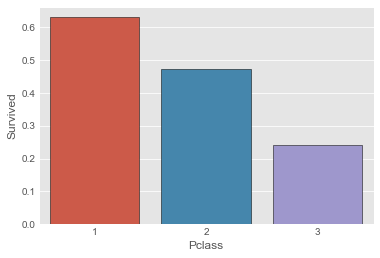

In [11]:
class_mean = titanic_data[["Pclass", "Survived"]].groupby(['Pclass'],as_index=False).mean()
sns.barplot(x='Pclass', y='Survived', data=class_mean,edgecolor='black')

And yes, you had better chance of surviving if you were boarding as a first class passenger

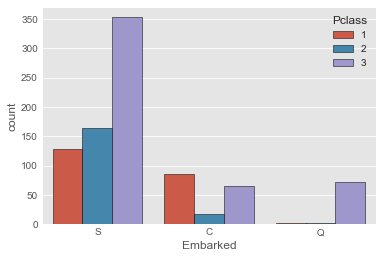

In [12]:
sns.countplot(x='Embarked', hue="Pclass", data=titanic_data, edgecolor='black')

Finally, it seems, indeed, that Cherbourg had a higher proportion of first class members in their number of passengers, but surprisingly there were a lot of third class member too. Excluding the super-rich outliers, could it be possible that there were a lot of women or child, embarked from Chesbourg, in the third class group?  

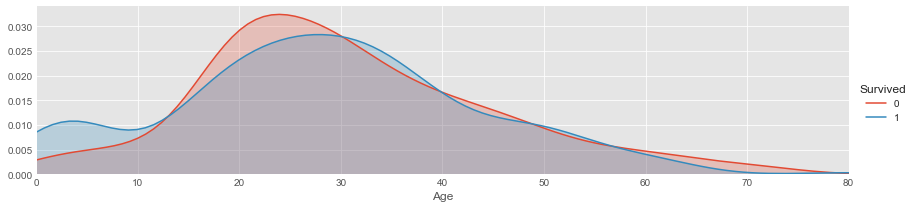

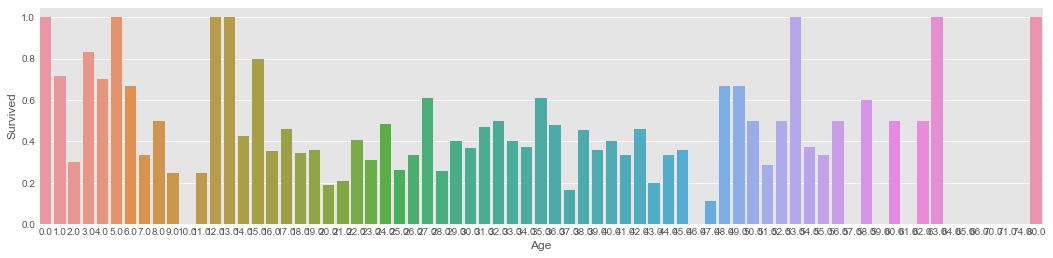

In [13]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_data['Age'].max()))
facet.add_legend()

# drop all null values, and convert to int
titanic_data['Age'] = titanic_data['Age'].dropna().astype(int)

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_data[['Age', 'Survived']].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data= average_age)


In [14]:
# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
titanic_data['Family'] =  titanic_data["Parch"] + titanic_data["SibSp"]
titanic_data.loc[titanic_data['Family'] > 0] = 1
titanic_data.loc[titanic_data['Family'] == 0] = 0